In [1]:
from typing import Literal
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import lass.plotting.shared as shared
from lass.plotting.shared import Baseline, shorten


In [20]:
# results = pd.read_csv('../../../artifacts/csv-results/scaling-0sh/128b.csv')
# results.rename(columns={results.columns[0]: 'task'}, inplace=True)

base = Path("../../../artifacts/csv-results-new/")
# path = base / "q1indistribution/deberta-base_bs32_3sh_instance-split-07161413"
path = base / "q1indistribution/deberta-base_bs32_0sh_instance-split-07161413"
# path = base / "reproduce_rev1_q1/deberta-base_bs32_0sh_instance-split-07161413"

results = shared.load_metrics(path)

results.sample(5)

,task,test_loss,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc,test_bs,test_bs_mcb,test_bs_dsc,...,test_conf_absolute_accuracy,test_conf_absolute_precision,test_conf_absolute_recall,test_conf_absolute_f1,test_conf_absolute_roc_auc,test_conf_absolute_bs,test_conf_absolute_bs_mcb,test_conf_absolute_bs_dsc,test_conf_absolute_bs_unc,test_conf_absolute_balanced_accuracy
66,what_is_the_tao,0.691839,0.428571,1.0,0.333333,0.5,0.500000,0.249480,0.142337,0.015306,...,0.142857,0.0,0.0,0.0,0.333333,0.754904,0.640618,0.008163,0.122449,0.5
35,logical_args,0.691732,0.333333,0.0,0.000000,0.0,0.500000,0.249482,0.082815,0.055556,...,0.666667,0.0,0.0,0.0,0.500000,0.324630,0.130186,0.027778,0.222222,0.5
15,english_russian_proverbs,0.454912,0.875000,0.0,0.000000,0.0,0.107143,0.136733,0.028400,0.001042,...,0.875000,0.0,0.0,0.0,0.750000,0.122697,0.068009,0.054688,0.109375,0.5
6,conceptual_combinations,0.742988,0.428571,0.0,0.000000,0.0,0.694444,0.274654,0.142786,0.113030,...,0.428571,0.0,0.0,0.0,0.388889,0.475029,0.232966,0.002834,0.244898,0.5
44,odd_one_out,0.651026,0.647059,0.0,0.000000,0.0,0.651515,0.228409,0.083311,0.083276,...,0.647059,0.0,0.0,0.0,0.560606,0.249153,0.041310,0.020531,0.228374,0.5


In [12]:
# Show top 5 tasks with highest test_roc_auc
results.sort_values('test_roc_auc', ascending=False).head(5)

,task,test_loss,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc,test_bs,test_bs_mcb,test_bs_dsc,...,test_conf_absolute_accuracy,test_conf_absolute_precision,test_conf_absolute_recall,test_conf_absolute_f1,test_conf_absolute_roc_auc,test_conf_absolute_bs,test_conf_absolute_bs_mcb,test_conf_absolute_bs_dsc,test_conf_absolute_bs_unc,test_conf_absolute_balanced_accuracy
32,epistemic_reasoning,0.037640,0.995122,1.000000,0.987013,0.993464,0.991173,0.005627,0.000804,0.229703,...,0.614634,0.416667,0.064935,0.112360,0.560471,0.235979,0.011300,0.009848,0.234527,0.505124
39,geometric_shapes,0.117737,0.944444,0.666667,1.000000,0.800000,0.976562,0.037989,0.010211,0.070988,...,0.902778,1.000000,0.125000,0.222222,0.892578,0.071769,0.025095,0.052091,0.098765,0.562500
46,hyperbaton,0.175399,0.956098,0.969072,0.940000,0.954315,0.974429,0.040310,0.006566,0.216108,...,0.512195,0.000000,0.000000,0.000000,0.523429,0.407528,0.162311,0.004634,0.249851,0.500000
18,cs_algorithms,0.182931,0.945783,0.920000,0.901961,0.910891,0.971014,0.047794,0.016017,0.181062,...,0.692771,0.000000,0.000000,0.000000,0.398465,0.294424,0.092357,0.010772,0.212839,0.500000
51,intent_recognition,0.335644,0.870504,0.888889,0.864865,0.876712,0.925572,0.103097,0.013581,0.159436,...,0.805755,0.861538,0.756757,0.805755,0.890021,0.161814,0.047828,0.134967,0.248952,0.809148


In [13]:
from typing import Optional


def filter_tasks(df: pd.DataFrame, task: str) -> pd.DataFrame:
    return df[df['task'] == task]

def plot_difference(
        sys1: pd.Series,
        sys2: pd.Series,
        sys1_threshold: Optional[float] = None,
        sys2_threshold: Optional[float] = None,
    ):
    sns.set_theme(style="whitegrid")

    task_system_col = f"test_conf_{baseline}_{metric}"
    assessor_col = f"test_{metric}"

    data = df[[task_system_col, assessor_col, 'task', 'instance_count']]
    data = data[df['test_conf_normalized_roc_auc'] > baseline_threshold]
    data = data[data['instance_count'] > count_threshold]
    data['diff'] = data[assessor_col] - data[task_system_col]
    data.sort_values(by='diff', inplace=True)

    # But _total at the end
    total = data[data['task'] == 'total']
    data = data[data['task'] != 'total']
    data = pd.concat([data, total])

    y = data.apply(lambda x: f"{shorten(x['task'], length=22)} ({x[task_system_col]:.2f})", axis=1)

    # plt.figure(figsize=(10,4))
    # p = sns.barplot(x="task", y="diff", data=data)
    plt.figure(figsize=(4,12))
    p = sns.barplot(x="diff", y=y, data=data, orient='h')
    # p.set_xticklabels(p.get_xticklabels(), rotation=90)
    # p.set_title(f"Assessor {metric} minus BIG-G {baseline} {metric}")
    for i in p.containers: # type: ignore
        print(i)
        p.bar_label(i,fmt='%+.2f', label_type='edge', padding=2)
    p.set_xlim(p.get_xlim()[0]*1.5, p.get_xlim()[1]*1.4)
    p.set_ylim(p.get_ylim()[0]*1.0, p.get_ylim()[1]*1.3)

    p.set_xlabel("Difference in AUROC")

    # return data

# plot(results, metric="accuracy")
plot_difference(
    results["test_conf_normalized_roc_auc"],
    results["test_roc_auc"],
    sys1_threshold=0.1,
)

NameError: name 'baseline' is not defined

<BarContainer object of 23 artists>


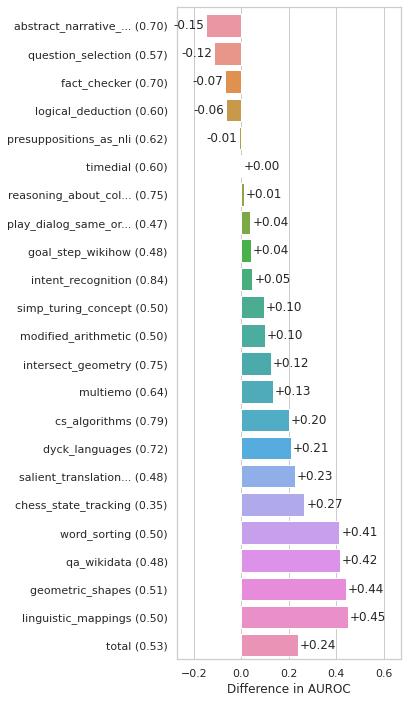

In [21]:

def plot_difference_old(
        df: pd.DataFrame,
        baseline: Baseline = "normalized",
        metric: str = "roc_auc",
        count_threshold: int = 100,
        baseline_threshold: float = 0.1
    ):
    sns.set_theme(style="whitegrid")

    task_system_col = f"test_conf_{baseline}_{metric}"
    assessor_col = f"test_{metric}"

    data = df[[task_system_col, assessor_col, 'task', 'instance_count']]
    # data = data[df['test_conf_normalized_roc_auc'] > baseline_threshold]
    data = data[data['instance_count'] > count_threshold]
    data['diff'] = data[assessor_col] - data[task_system_col]
    data.sort_values(by='diff', inplace=True)

    # But _total at the end
    total = data[data['task'] == 'total']
    data = data[data['task'] != 'total']
    data = pd.concat([data, total])

    y = data.apply(lambda x: f"{shorten(x['task'], length=22)} ({x[task_system_col]:.2f})", axis=1)

    # plt.figure(figsize=(10,4))
    # p = sns.barplot(x="task", y="diff", data=data)
    plt.figure(figsize=(4,12))
    p = sns.barplot(x="diff", y=y, data=data, orient='h')
    # p.set_xticklabels(p.get_xticklabels(), rotation=90)
    # p.set_title(f"Assessor {metric} minus BIG-G {baseline} {metric}")
    for i in p.containers: # type: ignore
        print(i)
        p.bar_label(i,fmt='%+.2f', label_type='edge', padding=2)
    p.set_xlim(p.get_xlim()[0]*1.5, p.get_xlim()[1]*1.4)
    p.set_ylim(p.get_ylim()[0]*1.0, p.get_ylim()[1]*1.3)

    p.set_xlabel("Difference in AUROC")

    # return data

# plot(results, metric="accuracy")
plot_difference_old(results, metric="roc_auc", baseline="normalized", count_threshold=100)

In [ ]:
def shorten(x, length=15):
    if len(x) > length:
        return x[:length-3] + "..."
    else:
        return x

def plot2(df: pd.DataFrame, baseline: Baseline = "normalized", metric: str = "roc_auc"):
    sns.set_theme(style="whitegrid")
    task_system_col = f"test_conf_{baseline}_{metric}"
    assessor_col = f"test_{metric}"

    data = df[[task_system_col, assessor_col, 'task', 'count']]
    data = data[df['test_conf_normalized_roc_auc'] > 0.1]
    data = data[data['count'] > 100]
    data['diff'] = data[assessor_col] - data[task_system_col]
    data['task'] = data['task'].apply(lambda x: shorten(x, length=22))
    # data.loc[df['task'] == "formal_fallacies_syllogisms_negation", 'task'] = "formal_fallacies_syllogisms_neg."
    # data.loc[df['task'] == "salient_translation_error_detection", 'task'] = "salient_translation_error_detect."

    # Sorting and adding total
    data.sort_values(by='diff', inplace=True)
    print(len(data))
    total = data[data['task'] == '_total']
    data = data[data['task'] != '_total']
    # data = data.append([{}], ignore_index=True)
    data = data.append(total)

    plt.figure(figsize=(4,12))
    
    y = data.apply(lambda x: f"{x['task']} ({x[task_system_col]:.2f})", axis=1)
    p = sns.barplot(y=y, x="diff", data=data, orient='h')
    for i in p.containers:
        print(i)
        p.bar_label(i,fmt='%+.2f', label_type='edge', padding=2)
    p.set_xlim(p.get_xlim()[0]*1.6, p.get_xlim()[1]*1.4)
    p.set_ylim(p.get_ylim()[0]*1.0, p.get_ylim()[1]*1.5)

    # disable x-axis labels
    p.set_xlabel("Difference in AUROC")
    plt.savefig(f'../artifacts/plots/main.svg', bbox_inches='tight', format='svg')

# plot(results, metric="accuracy")
plot2(results, metric="roc_auc")

KeyError: "['count'] not in index"

47
<BarContainer object of 47 artists>


/tmp/ipykernel_3328426/298291009.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(total)


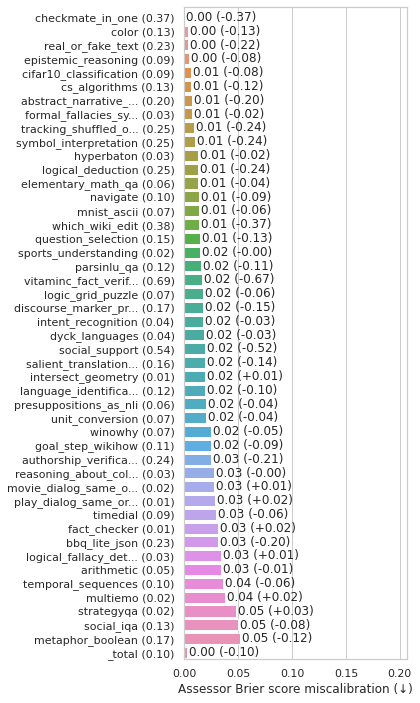

In [ ]:
def plot_mcb(df: pd.DataFrame, baseline: Baseline = "normalized", metric: str = "roc_auc"):
    sns.set_theme(style="whitegrid")
    task_system_col = f"test_conf_{baseline}_{metric}"
    assessor_col = f"test_{metric}"

    data = df[[task_system_col, assessor_col, 'task', 'count']]
    data = data[df['test_conf_normalized_roc_auc'] > 0.1]
    data = data[data['count'] > 100]
    data['diff'] = data[assessor_col] - data[task_system_col]
    data['task'] = data['task'].apply(lambda x: shorten(x, length=22))
    # data.loc[df['task'] == "formal_fallacies_syllogisms_negation", 'task'] = "formal_fallacies_syllogisms_neg."
    # data.loc[df['task'] == "salient_translation_error_detection", 'task'] = "salient_translation_error_detect."

    # Sorting and adding total
    data.sort_values(by=assessor_col, inplace=True)
    print(len(data))
    total = data[data['task'] == '_total']
    data = data[data['task'] != '_total']
    # data = data.append([{}], ignore_index=True)
    data = data.append(total)

    plt.figure(figsize=(4,12))
    
    y = data.apply(lambda x: f"{x['task']} ({x[task_system_col]:.2f})", axis=1)
    p = sns.barplot(y=y, x=assessor_col, data=data, orient='h')
    for i in p.containers:
        print(i)
        labels = [f"{m:.2f} ({diff:+.2f})" for diff, m in zip(data['diff'].values, data[assessor_col].values)]
        # p.bar_label(i,fmt='%+.2f', label_type='edge', padding=2)
        p.bar_label(i,labels=labels, label_type='edge', padding=2)
    p.set_xlim(p.get_xlim()[0]*1.2, p.get_xlim()[1]*3.8)
    p.set_ylim(p.get_ylim()[0]*1.0, p.get_ylim()[1]*1.5)

    # disable x-axis labels
    p.set_xlabel("Assessor Brier score miscalibration (↓)")
    plt.savefig(f'../artifacts/plots/main_mcb.svg', bbox_inches='tight', format='svg')

plot_mcb(results, metric="bs_mcb")